Creation of the test line

In [4]:
import pandas as pd
import numpy as np

df_test = pd.read_csv("fashion-mnist_test.csv")

Y_train = df_test.label
X_train = df_test.drop("label",axis=1)

jsonToSent = X_train.iloc[0].to_json()
jsonToSent = [eval(jsonToSent)]

Request

In [5]:
import requests
import json

URL = 'http://127.0.0.1:5000/classify'
r = requests.post(URL, json = jsonToSent)

In [ ]:
r.json()

[[0.9997243285179138,
  8.20674181908253e-16,
  6.46306086380939e-15,
  1.496496907127607e-18,
  7.150500766668706e-20,
  5.201160152245218e-17,
  0.000275688071269542,
  1.7500155032669057e-26,
  3.4085846568431875e-17,
  1.5459509340248555e-19]]

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
               'Sneaker','Bag','Ankle boot']

pred = np.argmax(r.json()[0])
print("Predicted :", pred,class_names[pred])
print("real : ", class_names[Y_train.loc[0]])

if pred ==Y_train.loc[0]:
    print("nice good pred !")
else:
    print("not good")

Predicted : 0 T-shirt/top
real :  T-shirt/top
nice good pred !


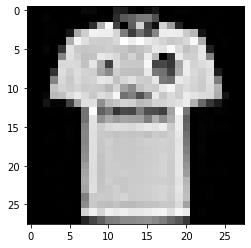

In [25]:
img = np.array(X_train.loc[0]).reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")
